<a href="https://colab.research.google.com/github/FatemeMolaeiJahromi/FatemeMolaeiJahromi/blob/Leishmania-Classification/Guass_Leishmania_Classification_Molaei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=077c2d1ebc3f43b76d77fa0acd76d904c7445847400aa22cc86b487768b8523c
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


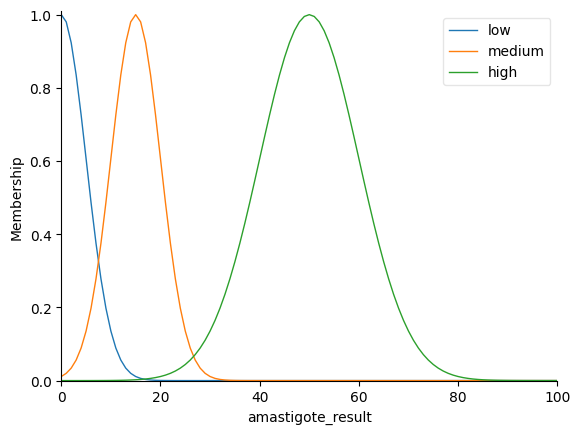

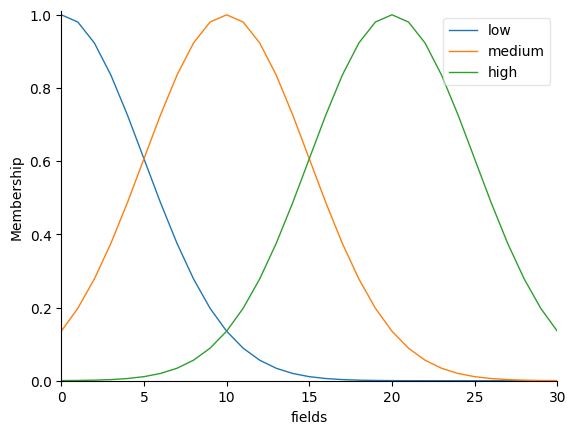

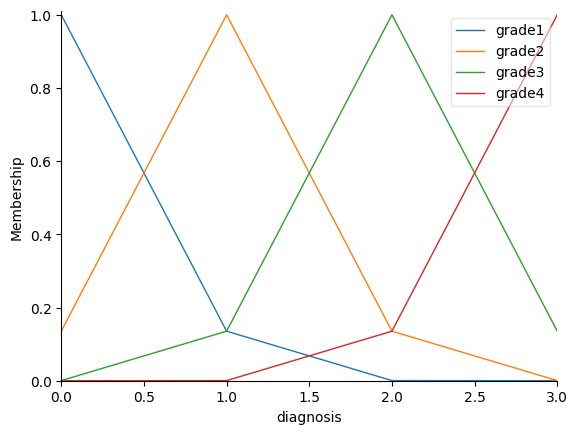

1.0939957146030521


In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Define the fuzzy variables
amastigote_result = ctrl.Antecedent(np.arange(0, 101, 1), 'amastigote_result')
fields = ctrl.Antecedent(np.arange(0, 31, 1), 'fields')
diagnosis = ctrl.Consequent(np.arange(0, 4, 1), 'diagnosis')

# Define the fuzzy sets for each variable using Gaussian membership functions
amastigote_result['low'] = fuzz.gaussmf(amastigote_result.universe, 0, 5)
amastigote_result['medium'] = fuzz.gaussmf(amastigote_result.universe, 15, 5)
amastigote_result['high'] = fuzz.gaussmf(amastigote_result.universe, 50, 10)

fields['low'] = fuzz.gaussmf(fields.universe, 0, 5)
fields['medium'] = fuzz.gaussmf(fields.universe, 10, 5)
fields['high'] = fuzz.gaussmf(fields.universe, 20, 5)

diagnosis['grade1'] = fuzz.gaussmf(diagnosis.universe, 0, 0.5)
diagnosis['grade2'] = fuzz.gaussmf(diagnosis.universe, 1, 0.5)
diagnosis['grade3'] = fuzz.gaussmf(diagnosis.universe, 2, 0.5)
diagnosis['grade4'] = fuzz.gaussmf(diagnosis.universe, 3, 0.5)

# Step 3.5: Plot the fuzzy membership functions
amastigote_result.view()
fields.view()
diagnosis.view()

# Step 3.6: Show the plots
plt.show()

# Define the fuzzy rules
rule1 = ctrl.Rule(amastigote_result['low'] & fields['high'], diagnosis['grade1'])
rule2 = ctrl.Rule(amastigote_result['medium'] & fields['medium'], diagnosis['grade2'])
rule3 = ctrl.Rule(amastigote_result['high'] & fields['medium'], diagnosis['grade3'])
rule4 = ctrl.Rule(amastigote_result['high'] & fields['high'], diagnosis['grade4'])

# Create the control system
diagnosis_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
diagnosis_sim = ctrl.ControlSystemSimulation(diagnosis_ctrl)

# Step 4.5: Print the fuzzy rules
print(diagnosis_ctrl.rules)

# Set input values
diagnosis_sim.input['amastigote_result'] = 8
diagnosis_sim.input['fields'] = 12

# Evaluate the control system
diagnosis_sim.compute()

# Print the output
print(diagnosis_sim.output['diagnosis'])

# **This code is Just Written By F.Molaei Jahromi**